# Introduction to Pandas

## Pandas provides Python data frames

* Popular and established
* Inspired by R dataframes
* Built on `numpy` for fast computation

In [1]:
import pandas as pd

## Our first dataframe

In [73]:
df = pd.DataFrame({"Names": ["Iverson", "Malone", "Bergen"],
                   "Python_mastery": [10, 5, 1.0],
                   "Love_of_R": [2, 5, 11],
                   "years_at_wsu": [3, 16, 4]})
df.head()

Names  Python_mastery  Love_of_R  years_at_wsu
0  Iverson            10.0          2             3
1   Malone             5.0          5            16
2   Bergen             1.0         11             4

## Reading from a csv

* Most data sets will be read in from a csv or JSON data file
* `Pandas` provides `read_csv` and `read_json`

In [4]:
artists = pd.read_csv("./data/Artists.csv")
artists.head()

ConstituentID      DisplayName            ArtistBio Nationality Gender  \
0              1   Robert Arneson  American, 1930–1992    American   Male   
1              2   Doroteo Arnaiz   Spanish, born 1936     Spanish   Male   
2              3      Bill Arnold  American, born 1941    American   Male   
3              4  Charles Arnoldi  American, born 1946    American   Male   
4              5      Per Arnoldi    Danish, born 1941      Danish   Male   

   BeginDate  EndDate  Wiki QID         ULAN  
0       1930     1992       NaN          NaN  
1       1936        0       NaN          NaN  
2       1941        0       NaN          NaN  
3       1946        0  Q1063584  500027998.0  
4       1941        0       NaN          NaN

# JSON data file

* Another (more modern) storage
* Here the data is stored in row `dict`

In [5]:
!head -n 23 ./data/Artists.json

[
{
  "ConstituentID": 1,
  "DisplayName": "Robert Arneson",
  "ArtistBio": "American, 1930–1992",
  "Nationality": "American",
  "Gender": "Male",
  "BeginDate": 1930,
  "EndDate": 1992,
  "Wiki QID": null,
  "ULAN": null
},
{
  "ConstituentID": 2,
  "DisplayName": "Doroteo Arnaiz",
  "ArtistBio": "Spanish, born 1936",
  "Nationality": "Spanish",
  "Gender": "Male",
  "BeginDate": 1936,
  "EndDate": 0,
  "Wiki QID": null,
  "ULAN": null
},


## Reading a JSON data file

* Another (more modern) storage
* Here the data is stored in row `dict`

In [59]:
artists = pd.read_json("/Users/tiverson/Desktop/dsci430data/MoMA/Artists.json")
artists.head()

ArtistBio  BeginDate  ConstituentID      DisplayName  EndDate  \
0  American, 1930–1992       1930              1   Robert Arneson     1992   
1   Spanish, born 1936       1936              2   Doroteo Arnaiz        0   
2  American, born 1941       1941              3      Bill Arnold        0   
3  American, born 1946       1946              4  Charles Arnoldi        0   
4    Danish, born 1941       1941              5      Per Arnoldi        0   

  Gender Nationality         ULAN  Wiki QID  
0   Male    American          NaN      None  
1   Male     Spanish          NaN      None  
2   Male    American          NaN      None  
3   Male    American  500027998.0  Q1063584  
4   Male      Danish          NaN      None

## <font color="red"> Exercise 2 </font>
    
Use tab-completion and `help` to discover and explore two more methods of reading a file into a `Pandas` dataframe.


In [ ]:
pd.read_ #<-- Tab here

## So what is a `DateFrame`

* Like R, Pandas focuses on columns
* Think `dict` of `(str, Series)` pairs 
* A series is a typed list-like structure

In [7]:
# This is how I imagine a dataframe
df = pd.DataFrame({"Names": ["Iverson", "Malone", "Bergen"],
                   "Python_mastery": [10, 5, 1.0],
                   "years_at_wsu": [3, 14, 4]})

## Columns are `Series` and hold one type of data

In [8]:
type(artists.BeginDate), type(artists.DisplayName)

(pandas.core.series.Series, pandas.core.series.Series)

In [9]:
artists.BeginDate.dtype, artists.DisplayName.dtype

(dtype('int64'), dtype('O'))

## Two ways to access a column

* **Method 1:** like a dictionary
    * `df["column_name"]`
* **Method 2:** like an object attribute
    * `df.column_name`
    * Only for proper names!

In [10]:
artists.BeginDate.head(2)

0    1930
1    1936
Name: BeginDate, dtype: int64

In [11]:
artists['BeginDate'].head(2)

0    1930
1    1936
Name: BeginDate, dtype: int64

## More on data types

* See all data types with `df.dtypes`
* You can set the `dtypes` when you read a dataframe
* Read more about types: [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dtypes.html)

In [12]:
artists.dtypes

ArtistBio         object
BeginDate          int64
ConstituentID      int64
DisplayName       object
EndDate            int64
Gender            object
Nationality       object
ULAN             float64
Wiki QID          object
dtype: object

# Getting to know your data

## Data Cleaning Checklist

1. Deal with column names
2. Deal with text columns
3. Deal with numeric columns
4. Deal with dates
5. Look at relationships between columns

## Basic inspection tools

* `df.head()`        first five rows
* `df.tail()`        last five rows
* `df.sample(5)`     random sample of rows
* `df.shape`         number of rows/columns in a tuple
* `df.describe()`    calculates measures of central tendency
* `df.info()`

## <font color="red"> Exercise 1: Load and inspect the artwork from MoMA </font>

Make sure you can load both the csv and json files

[Data source](https://github.com/MuseumofModernArt/collection)

## Inpecting columns

* First step in understanding data
* Look for problems with
    * the *column names*
    * column types
    * column statistics
    * column plots


## Data Cleaning Checklist

1. Deal with column names
2. Deal with text columns
3. Deal with numeric columns
4. Deal with dates
5. Look at relationships between columns

## Data Cleaning Step 1 - Dealing with column names

#### Necessary Steps

* Carefully inspect the names 
* Strip whitespace
* Replace spaces with `_`
* Remove other offending characters
    * Punctuation
    * Latin symbols like å
* Make sure column names are unique
* Inspect the column type.  Anything unexpected?
* **Advanced** Is there measurement data in the labels?  If so, you need to reshape

#### Optional Steps

* Make all lowercase 
* Add prefix 
    * if combining with another table 
* Look for other ways to make them meaningful but short

## Inspecting column names  - Pandas

Use the `df.columns` attribute

In [60]:
artists.columns

Index(['ArtistBio', 'BeginDate', 'ConstituentID', 'DisplayName', 'EndDate',
       'Gender', 'Nationality', 'ULAN', 'Wiki QID'],
      dtype='object')

## <font color="red"> Exercise 2: Run through the checklist. </font>

What are the issues that need to be fixed in the `artist` header?

*Your thoughts here*

## <font color="red"> Exercise 3 </font>

Apply the checklist to the `artwork` data frame.  What issues need to be fixed?

*Your thoughts here*

## Accessing columns with improper names

Note the column `'Wiki QID'`.

* Not a proper Python name
* No attribute
* Access with `artists['Wiki QID']`

In [ ]:
artists.Wiki # <-- Try tab ... doesn't work ... no attribute

In [21]:
artists['Wiki QID'].head()

0        None
1        None
2        None
3    Q1063584
4        None
Name: Wiki QID, dtype: object

## Fixing column names

Most Python string methods are available in `df.columns.str`

In [22]:
artists.columns.str.replace(' ', '_')

Index(['ArtistBio', 'BeginDate', 'ConstituentID', 'DisplayName', 'EndDate',
       'Gender', 'Nationality', 'ULAN', 'Wiki_QID'],
      dtype='object')

In [61]:
artists.columns = artists.columns.str.replace(' ', '_')
artists.Wiki_QID.head()

0        None
1        None
2        None
3    Q1063584
4        None
Name: Wiki_QID, dtype: object

## Renaming columns, a functional approach

* Using assignment can break our flow.
* Mutation makes reasoning about programs hard.
* In practice, we will use `dfply.rename` in a pipe

In [62]:
from dfply import rename, head
(artists >>
  rename(Wiki_QID = "Wiki QID") >>
  head)

ArtistBio  BeginDate  ConstituentID      DisplayName  EndDate  \
0  American, 1930–1992       1930              1   Robert Arneson     1992   
1   Spanish, born 1936       1936              2   Doroteo Arnaiz        0   
2  American, born 1941       1941              3      Bill Arnold        0   
3  American, born 1946       1946              4  Charles Arnoldi        0   
4    Danish, born 1941       1941              5      Per Arnoldi        0   

  Gender Nationality         ULAN  Wiki_QID  
0   Male    American          NaN      None  
1   Male     Spanish          NaN      None  
2   Male    American          NaN      None  
3   Male    American  500027998.0  Q1063584  
4   Male      Danish          NaN      None

## <font color="red"> Exercise 3 </font>
    
Inspect `dir(artwork.columns.str)` and say hello to some old friends


## <font color="red"> Exercise 4 </font>
    
Identify and fix any problems with the column names of `artwork`


## Inspecting types and counts

In [43]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15817 entries, 0 to 15816
Data columns (total 9 columns):
ArtistBio        13540 non-null object
BeginDate        15817 non-null int64
ConstituentID    15817 non-null int64
DisplayName      15817 non-null object
EndDate          15817 non-null int64
Gender           12669 non-null object
Nationality      13321 non-null object
ULAN             2941 non-null float64
Wiki_QID         3281 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


## Step 1 - Inspect counts to see missing data

<img src="img/info_1.png" widht=400>

## Step 2 - Look for unexpected types

<img src="img/info_2.png" widht=400>

## <font color="red"> Exercise 5 </font>
    
**Task:** Inspect the types and head of `artwork`.  

1. Which columns have the wrong type?  
2. What should the types be?  
3. Why are they 


In [1]:
# Your code there

*Your thoughts here*

## Data Cleaning Step 2 - Dealing with a numeric column

#### Necessary steps

* Inspect numeric summaries.  Do they make sense?
* Plot a histogram.  Anything unusual?
* Look at the min/max values.  Are they reasonable?
* Think about practical bounds
    * 0 <= percent <= 100
    * 0 <= fraction <= 1
    * Height > 0
* How are missing values represented?  Is if consistent?
    * Watch out for `0` in place of missing.
    

#### Optional steps

* Apply a log/sqrt transform to skewed data
* Remove outliers?
* Impute missing values?

## Inspecting numeric columns

* Statistic: `describe()`

In [46]:
artists.BeginDate.describe()

count    15817.000000
mean      1467.455143
std        825.486628
min          0.000000
25%       1830.000000
50%       1922.000000
75%       1949.000000
max       2017.000000
Name: BeginDate, dtype: float64

## Be a data detective

<img src="./img/artist_describe.png" width=400>

## Be a data detective

<img src="./img/artist_describe_really.png" width=400>

## Inspecting numeric columns

* Plots: `plot('hist')`
    * Requires `matplotlib.pylab`

**Question:** What's up with the left-most bar?  How should this be fixed?

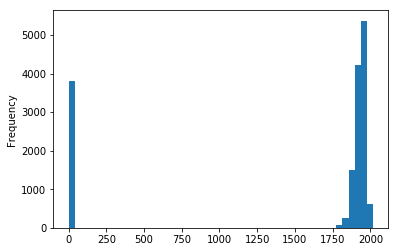

In [65]:
import matplotlib.pylab as plt
%matplotlib inline
artists.BeginDate.plot('hist', bins = 50)

## How is missing data represented?

<img src="./img/artist_zero_is_missing.png" width=400>

We will fix this soon!

## Data Cleaning Step 2 - Dealing with a text column

#### Necessary steps

* Inspect a list of unique labels and their counts
    * Look at the most common and fix common errors
    * Look at the least common, odd cases hide here
* Plot the frequency distribution.  Anything unusual?
* How are missing data represented?  Is it consistent?
    * Switch to `np.NaN` (Pandas), `None` (pure Python), `null` (Spark SQL)
* Look for and fix similarities in the labels
    * i.e. "Todd" vs. "todd"

## Data Cleaning Step 2 - Dealing with a text column
#### Optional steps

* Consider switching to lowercase
* Consider adding a `"Other"` category for rare labels
* Consider recoding into broader categories

## Inspecting text columns

* Stats: `value_counts()`
* Number of labels: `value_counts().shape

In [31]:
artists.Nationality.value_counts().shape # Number of unique labels

(130,)

In [32]:
artists.Nationality.value_counts()

American               5454
German                  976
French                  898
British                 872
Italian                 554
Japanese                509
Swiss                   294
Dutch                   270
Russian                 259
Austrian                248
Nationality unknown     209
Canadian                207
Brazilian               177
Spanish                 158
Argentine               151
Mexican                 135
Polish                  135
Swedish                 134
Danish                  121
Chinese                  97
Belgian                  95
Czech                    85
Israeli                  79
Chilean                  74
Cuban                    70
South African            70
Australian               65
Finnish                  63
Hungarian                55
Venezuelan               52
                       ... 
Paraguayan                2
Congolese                 2
Native American           1
Cypriot                   1
Kuwaiti             

## Inspecting text columns

* Plot: `value_counts().plot('bar')`

**Question:** Do you see any problems?

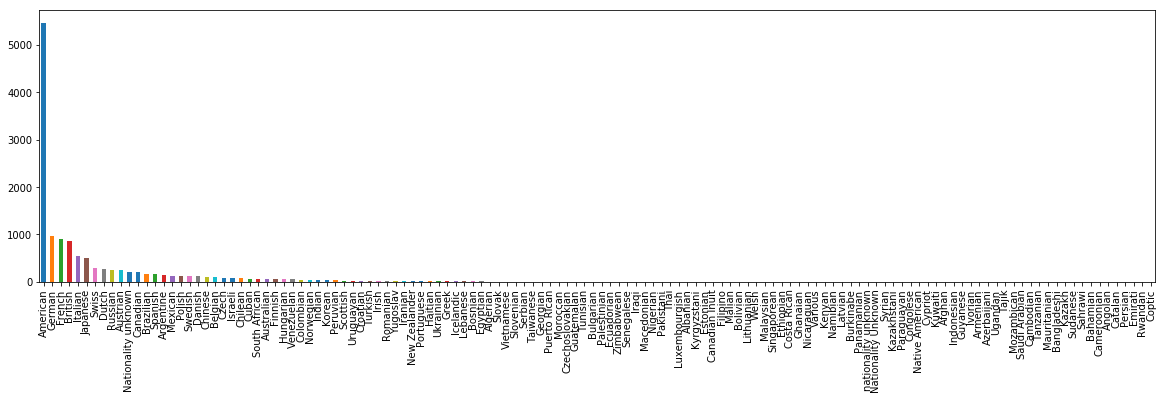

In [33]:
plt.figure(figsize=(20,5))
artists.Nationality.value_counts().plot('bar')

## Be a Data Detective

<img src="./img/nationality_unknown.png" width=400>

## Using `head` to inspect the most common labels

Note that

* `value_counts` are sorted in descending order
* we can add `head` to the chain to 

In [34]:
artists.Nationality.value_counts().head(10)

American    5454
German       976
French       898
British      872
Italian      554
Japanese     509
Swiss        294
Dutch        270
Russian      259
Austrian     248
Name: Nationality, dtype: int64

## Using `head` with `plot`

Note that

* `value_counts` are sorted in descending order
* we can add `head` to the chain to 

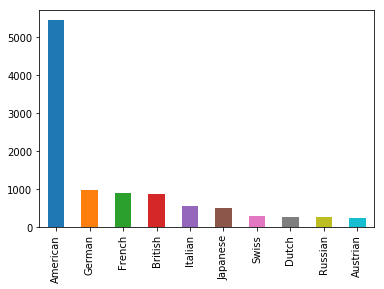

In [79]:
artists.Nationality.value_counts().head(10).plot('bar')

## <font color="red"> Exercise 5 </font>
    
**Task:** Inspect the statistics and plots for `artwork`.  Be sure to look at one variable of each type.

## Data Cleaning Step 4 - Dealing with a date column

#### Necessary steps

* Is the formating consistent?
* Correct conversion?
    * Two digit year?  How is this converted?
* Make columns for various date-parts
    * year
    * month
    * day
    * etc.
* Make plots of the date-parts and look for unusual values

## Data Cleaning Step 5 - Inspect relationship between columns

#### Necessary steps

* Compute cross-tabulated summary methods
    * **Text + Numeric** Group-by mean/median/SD/IQR
    * **Text + Text** Group-by counts/percents
* Plot the relationship
    * **Text + Numeric** side-by-side box plot
    * **Text + Text** mosiac plot
    * **Numeric + Numeric** scatter plot
* Look for unusual values.
    * i.e. `0` as missing often shows up in scatterplots

# Preview of Coming Attractions

## R and Python can interact!

In [66]:
#!pip install rpy2 tzlocal
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [67]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
%%R
rnorm(5, 2, 3)

[1] -1.787447  4.034125  1.743742  1.597456  4.410406


## We love dplyr!

In [69]:
%%R -i artists -o output
library(dplyr)

(artists %>%
select(BeginDate, DisplayName, Nationality) %>%
filter(BeginDate > 0) %>%
head) -> output
output

  BeginDate     DisplayName Nationality
1      1930  Robert Arneson    American
2      1936  Doroteo Arnaiz     Spanish
3      1941     Bill Arnold    American
4      1946 Charles Arnoldi    American
5      1941     Per Arnoldi      Danish
6      1925   Danilo Aroldi     Italian


## Wait ... did you just run R dplyr code in a jupyter notebook?
<img src='./img/r_magic_1.png' width=400>

#### Yep

## Wait ... did you just pass a `Pandas` dataframe to `dplyr`

<img src='./img/r_magic_2.png' width=400>

#### Yes ... yes I did.

## Wait ... OMG ... did you just pass the result BACK TO PYTHON!!1!one! 

<img src='./img/r_magic_3.png' width=400>

#### Ummm hmmmm

In [70]:
output

BeginDate      DisplayName Nationality
0       1930   Robert Arneson    American
1       1936   Doroteo Arnaiz     Spanish
2       1941      Bill Arnold    American
3       1946  Charles Arnoldi    American
4       1941      Per Arnoldi      Danish
5       1925    Danilo Aroldi     Italian

## HOLD ON! ... isn't that CHEATING!

#### ... maybe your right ...

## Up Next

In the [next lecture](./1_2_dfply_and_data_cleaning.ipynb), we will introduce `dfply`, which provides pipeable `dplyr`-like table processing.